<a href="https://colab.research.google.com/github/junehyung1112/hello-world/blob/master/7%EA%B0%95_Softmax_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#softmax 알고리즘: 데이터가 여러 그룹으로 나누어져 있을 때 이를 분류.
#로직스틱 회귀와 달리 n개의 범주로 분류.
#2차원 공간에서 3가지 품종을 각각의 물리적인 특성에 따라 3가지 영역으로 구분 가능.
#3개의 영역을 잘 구분할 수 있는 직선 학습: softmax
#one-hot encoding = 샘플 하나에 대해 클래스 수 만큼 y값 확장.
#클래스 수 = 분류기 수
#softmax를 사용해 다중 class로 분류하려면
#y값을 one-hot encoding값으로 만들어 행렬값으로 지정해야함.
#결과값으로 최댓값을 가지는 분류기에 따라 무엇인지 결정.
#단 분류기에서의 확률값이 비슷하게 나온 경우, 판단을 보류함.
#다중 틀래스 예측은 출력값을 확률값으로 바꿔야 함.
#정규화 : 전체 데이터 중 자신의 데이터의 비율을 계산.
#softmax 정규화: 전체 데이터 합으로 자신의 출력값을 나누어줄때, 지수함수를 사용.
#이유 : 값이 급격하게 변하기 때문에 지수함수를 사용.
#작은 값들을 작게 하고 큰 값을 더 크게 만들 수 있음.

#정답인 경우 cost가 0에 가깝게 오답일 경우 cost를 무한대 값을 가지게 정의해야함.
#이러한 특성에 맞는 함수가 -log(x)함수.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #csv파일 가져오는 데 사용.

%matplotlib inline

sess = tf.Session()


In [0]:
#직선의 방정식 wx + b와 xw + b
#tensorfloow로 코딩 할 때는 xw + b로 연산.
#2차원 이상일 경우 x가 행렬이어야하므로 *연산자 대신 행렬곱을 사용.
x = tf.constant([[1.0, 2.0]]) #대괄호 두번은 행렬을 의미.
w = tf.constant([[3.0], [4.0]])

y = tf.matmul(x, w)
print(sess.run(y))



[[11.]]


In [0]:
#one-hot encoding
y = [2,1,0,0]

y_data = [[0,0,1],
          [0,1,0],
          [1,0,0],
          [1,0,0]]

In [0]:
#학습데이터가 많아질 시 위에처럼 임의로 입력하기는 힘듬.
def one_hot(y, nclass) :
  r = y.shape[0]
  mat = np.zeros([r, nclass])
  for i in range(r):
    mat[i, y[i]] = 1
  return mat

In [0]:
#one-hot encoding된 것을 다시 label로 돌려야할 필요가 있을 때도 있음.
def one_hot_2_label(y, nclass):
  return np.argmax(y, axis=1) #axis가 1일 때 각각의 행벡터에 대해 최댓값의 인덱스를 return

In [0]:

y = np.array([0,0,2,1,2,1])
y_data = one_hot(y,3)
print(y_data)

l = one_hot_2_label(y_data, 3)
print(l)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[0 0 2 1 2 1]


In [0]:
#텐서플로우가 제공하는 onehot함수를 이용.
#텐서플로우의 onehot함수를 사용하면 gpu에서 고속 연산 가능.
y_data = sess.run(tf.one_hot([0,0,2,1,2,1,], 3))
print(y_data)
l = sess.run(tf.argmax(y_data, axis=1)) #one hot 인코딩된 행렬을 다시 label로 변환.
print(l)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
[0 0 2 1 2 1]


In [0]:
#지수함수를 사용하는 소프트맥스 정규화.
#출력한 값을 확률로 표현하기 위해 비율을 계산.
#확률값의 차이를 좀더 확실히 구분하기 위해 지수함수 사용.
x = np.array([0.4, 0.8, 1.6, 3.2])
n = x / np.sum(x) #일반적인 정규화.
print(n)

n2 = sess.run(tf.nn.softmax(x)) #텐서플로우의 softmax함수를 이용하면 쉽게 사용가능.
print(n2)

#후자는 작은 값은 작아지고 큰 값은 커짐.

[0.06666667 0.13333333 0.26666667 0.53333333]
[0.04493052 0.06702845 0.14917457 0.73886646]


Text(0.5, 1.0, 'softmax(x)')

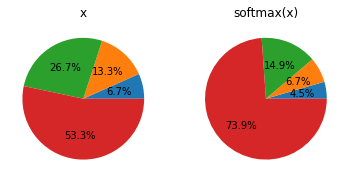

In [0]:
#정규화된 확률을 파이그래프를 이용해 시각적으로 표현.
plt.subplot(121) #두개의 그래프를 동시에 출력하기 위해 subplot함수 사용.
plt.pie(n, autopct="%1.1f%%")
plt.title("x")

plt.subplot(122)
plt.pie(n2, autopct="%1.1f%%")
plt.title("softmax(x)")

In [0]:
#소프트 맥스에서 사용하는 cost 함수인 cross entropy에 대해 알아보기.
p = [0.1, 0.3, 0.6] #세개의 클래스에 대한 확률값이 주어짐.
y = [1.0, 0, 0] #x데이터는 첫번째 클래스에 속한다고 생각하고 원핫인코딩을 수행한 결과.
entropy = y * tf.log(p) 
entropy_sum = -tf.reduce_sum(entropy)
print(sess.run(entropy))
print(sess.run(entropy_sum))
#오류이기 때문에 크로스 엔트로피가 크게 나옴.

[-2.3025851 -0.        -0.       ]
2.3025851


In [0]:
p = [0.1, 0.3, 0.6] #세개의 클래스에 대한 확률값이 주어짐.
y = [0, 0, 1.0] #x데이터는 첫번째 클래스에 속한다고 생각하고 원핫인코딩을 수행한 결과.
entropy = y * tf.log(p) 
entropy_sum = -tf.reduce_sum(entropy)
print(sess.run(entropy))
print(sess.run(entropy_sum))
#정답이기 때문에 크로스 엔트로피가 작게 나옴.

[-0.        -0.        -0.5108256]
0.5108256


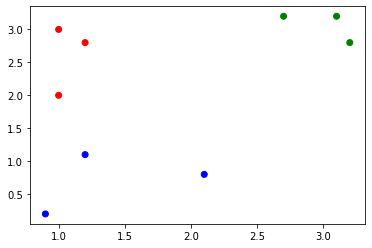

In [0]:
#가상의 data set을 분류하기.
nb_classes = 3
dim = 2

x_data = np.array([
          [1, 2],
          [1.0, 3],
          [1.2, 2.8],
          [2.7, 3.2],
          [3.2, 2.8],
          [3.1, 3.2],
          [0.9, 0.2],
          [1.2, 1.1],
          [2.1, 0.8]])

y_data = np.array([0,0,0,1,1,1,2,2,2])

colors = ["red"  if i == 0  else  (   "green"  if i == 1 else "blue")   for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

In [0]:
#one-hot 인코딩 함수를 사용해 y data를 9*3행렬로 변경.
def one_hot(y, nclass) :
    r = y.shape[0]
    mat = np.zeros([r, nclass])
    for i in range(r) :
        mat[i, y[i]] = 1        
    return mat

y_data_one_hot = one_hot(np.array(y_data) , nb_classes)
print(y_data_one_hot)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:
x = tf.placeholder("float", [None, dim])
y = tf.placeholder("float", [None, nb_classes])


w = tf.Variable(tf.random_normal([dim, nb_classes])) #2차원 데이터 클래스 수는 3 2*3 행렬로 초기화.
b = tf.Variable(tf.random_normal([nb_classes])) #클래스마다 학습되어야 해서 크기가 3인 벡터를 생성해 랜덤값으로 초기화

hypothesis = tf.nn.softmax(tf.matmul(x, w) + b) #softmax 출력값이 계산됨.


cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))

update = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)#경사하강법으로 최적하ㅘ

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(7001):
    sess.run(update, feed_dict={x: x_data, y: y_data_one_hot})
    if step % 1000 == 0:
           c= sess.run(cost, feed_dict={x: x_data, y: y_data_one_hot})
           print(step, c)
#이처럼 다중 분류를 사용해도 학습 코드는 동일하고 cost함수만 제대로 하면 됨.
#cost값이 줄어듬을 확인할 수 있음 -> 학습이 진행중.

0 1.5712943
1000 0.051022306
2000 0.026348809
3000 0.017829541
4000 0.0135007715
5000 0.010876522
6000 0.009113701
7000 0.0078469245


In [0]:
#학습 데이터에 대한 예측값과 정확도를 계산.
#예측값을 계산 
#클래스가 3개이고 두개의 데이터를 가지고 예측값을 계산한다면 소프트맥스 후에는 2*3이 됨.
#여기에 argmax를 적용하면 각각의 행에 의해서 최댓값을 갖는 인덱스가 리턴됨.
#처음에는 0.8 -> 2 e두번째는 0.6 -> 1
#이렇게 해서 주어진 두개의 데이터에 대한 예측값 알 수있음.
#one-hot encoding 행렬도 argmax로 레이블을 찾음.
#결과 두개를 비교해서 true인 것은 맞고 false인 것은 레이블이 일치하지 않는 것
#이 결과를 compared에 저장. 그 후 평균을 계산 -> 정확도.
"""  
  softmax(hypothesis) ->   [ 0.1  0.1   0.8]   -> argmax ->  [ 2 1]   
                           [ 0,1  0.6   0.3]                            
  y =  [ 0 0 1]     argmax ->   [ 2 0]
       [ 1 0 0]  
  equal(  [2 1] ,   [2  0] )    ->  [true, false]   ->  cast ->   [1.0  0.0]   -> mean   -> 0.5    
""" 

predicted = tf.argmax(hypothesis, 1)
compared = tf.equal(predicted , tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(compared, tf.float32))

p, a = sess.run([predicted, accuracy],  feed_dict={x: x_data, y:y_data_one_hot})
print(p)
print(a)
#간단한 데이터 여서 학습 인식률은 100%로 나옴.

[0 0 0 1 1 1 2 2 2]
1.0


(35, 35)


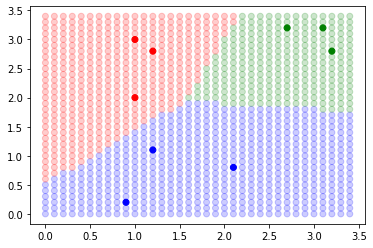

In [0]:
colors = ["red"  if i == 0  else  (   "green"  if i == 1 else "blue")   for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors) 


xx, yy = np.mgrid[0:3.5:0.1, 0:3.5:0.1] #mgrid함수를 사용해 결정경계출력. x축과 y축이 0~3.5까지 변하면서 
#0.1의 간격으로 점을 만들어 xx, yy에 저장. 
print(xx.shape)
grid = np.c_[xx.flatten(), yy.flatten()] #xx와 yy를 flatten함수를 사용해 1차원 벡터로 변환. 그후 concat함수로
#각 열을 결합하여 새로운 행렬을 만듬.

p = sess.run(predicted, feed_dict={x: grid})
colors = ["red"  if i == 0  else  (   "green"  if i == 1 else "blue")      for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

In [0]:
from google.colab import drive #구글 드라이브에서 정보를 가져오기 위해서 코랩과 구글 드라이브를 연동.
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#붓꽃을 분류. 꽃잎 폭과 길이, 꽃받침의 폭과 길이의 4개 측정값으로 구성.
df = pd.read_csv('/content/drive/My Drive/files/iris.csv')
df.head(4)
#4개의 데이터를 가진 75개의 샘플 중 pandas로 처음 4개의 샘플을 출력.
#데이터의 0~3 column이 학습데이터 마지막이 레이블. 레이블은 1~3으로 이루어짐.

,5.1,3.5,1.4,0.2,1
0,4.9,3.0,1.4,0.2,1
1,4.7,3.2,1.3,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1


In [0]:
#numpy 모듈을 사용해 csv파일을 로딩
data = np.loadtxt('/content/drive/My Drive/files/iris.csv', delimiter=",", dtype=np.float32)

dim = 4 #특징 차원의 수
nb_classes = 3 #분류할 클래스 수
x_data = data[:, 0:dim] #처음 4개의 특징 데이터를 저장
y_data = data[:,dim] -1    # 데이터의 마지막 속성 저장. 레이블이 1~3으로 이루어져 있어서 -1을 해서 0~2로 만듬

x = tf.placeholder("float", [None, dim])
y = tf.one_hot(y_data, nb_classes)

w = tf.Variable(tf.random_normal([dim, nb_classes])) #4*3 행렬, 랜덤값으로 초기화.
b = tf.Variable(tf.random_normal([nb_classes])) #클래스마다 추정되어야 해서 크기 3의 벡터로 촉화

hypothesis = tf.nn.softmax(tf.matmul(x, w) + b) 


cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1)) #cross entropy를 사용해 cost 계산
update = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(5001): #학습은 5000번 수행하고 500번마다 cost함수의 결과값을 출력.
    sess.run(update, feed_dict={x: x_data})
    if step % 500 == 0:
           print(step, sess.run(cost, feed_dict={x: x_data}))    


0 6.838736
500 0.1537587
1000 0.10329458
1500 0.08305176
2000 0.07168589
2500 0.064232685
3000 0.05888445
3500 0.05481292
4000 0.051580843
4500 0.048933722
5000 0.046712518


In [0]:
#학습 인식률을 계산.
predicted = tf.argmax(hypothesis, 1) #소프트 맥스의 최대 출력값의 위치 즉 예측 레이블 계산
compared = tf.equal(predicted , tf.argmax(y, 1)) #one0hot encoding된 학습 레이블의 최대값 위치가 같은지 파악.
accuracy = tf.reduce_mean(tf.cast(compared, tf.float32)) #compared 값에서 true를 1로 false를 0으로 변환. 그 후 평균을 냄.

print("인식률",   sess.run(accuracy,  feed_dict={x: x_data}) )


인식률 1.0


(75, 3)


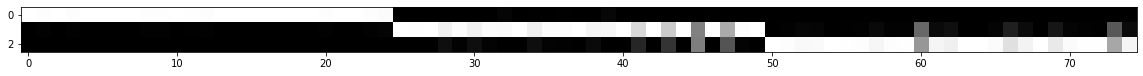

In [0]:
h = sess.run(hypothesis, feed_dict={x: x_data})
plt.figure(1, figsize=(20,40))
print(h.shape) #75*3 크기
plt.imshow(h.T, cmap='gray') #transpose로 인해 3*75 1이면 흰 0이면 검은 그 사이면 회색으로 표현
#4차원 데이터의 경우 결정경계를 분석하기 어려움(2차원일 때만 가능)
#75개 데이터에 대한 softmax 출력값을 이미지로 출력해 분석하기.
#25개씩 순차적으로 구성되어 있음을 알 수 있음. 처음 25개는 클래스 1에 속함.
#2번째 그룹과 3번째 그룹에서의 일부 데이터는 인식에 혼란이 있을 수 있음.

In [0]:
#특징차원을 3개로 줄여보자.
data = np.loadtxt('/content/drive/My Drive/files/iris.csv', delimiter=",", dtype=np.float32)

dim = 4 #특징 차원의 수
nb_classes = 3 #분류할 클래스 수
x_data = data[:, 0:dim] #처음 4개의 특징 데이터를 저장
y_data = data[:,dim] -1    # 데이터의 마지막 속성 저장. 레이블이 1~3으로 이루어져 있어서 -1을 해서 0~2로 만듬

x = tf.placeholder("float", [None, dim])
y = tf.one_hot(y_data, nb_classes)

w = tf.Variable(tf.random_normal([dim, nb_classes])) #4*3 행렬, 랜덤값으로 초기화.
b = tf.Variable(tf.random_normal([nb_classes])) #클래스마다 추정되어야 해서 크기 3의 벡터로 촉화

hypothesis = tf.nn.softmax(tf.matmul(x, w) + b) 


cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1)) #cross entropy를 사용해 cost 계산
update = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

0 2.3341432
500 0.14184108
1000 0.09705002
1500 0.07846758
2000 0.06793908
2500 0.06101414
3000 0.05603919
3500 0.05224984
4000 0.049240693
4500 0.046775397
5000 0.04470608
인식률 1.0


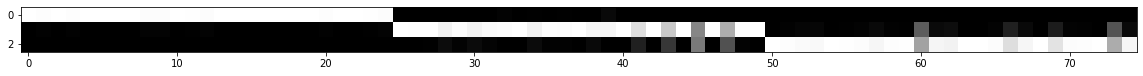

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(5001):
    sess.run(update, feed_dict={x: x_data})
    if step % 500 == 0:
           print(step, sess.run(cost, feed_dict={x: x_data}))     
            
            
predicted = tf.argmax(hypothesis, 1)
compared = tf.equal(predicted , tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(compared, tf.float32))

print("인식률",   sess.run(accuracy,  feed_dict={x: x_data}) )

h = sess.run(hypothesis, feed_dict={x: x_data})
plt.figure(1, figsize=(20,40))
plt.imshow(h.T, cmap='gray')
#위의 코드와 다 같지만, 학습후 인식률과 softmax 값을 시각화함.


In [0]:
#특정 와인에 대해서 13개의 화학적 특성을 측정하여 분류되지 않은 와인에 대해 화확적 특성을 측정 후, 어떤 종류의 와인인지 예측
df = pd.read_csv('/content/drive/My Drive/files/wine.csv')
df.head(4)

,#Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [0]:
data = np.loadtxt("/content/drive/My Drive/files/wine.csv", delimiter=",", dtype=np.float32)
print(data.shape) 

dim = 13   #특징 차원 = 13개
x_data = data[:, 1:] #x는 두번째부터 끝까지
y_data = data[:,0] -1   #y는 첫번째, 레이블이 1~3으로 되어있어서 1을 빼서 0~2로 만듬.
x_data = x_data / np.max(x_data, axis=0) #데이터를 0~1로 정규화.

(178, 14)


In [0]:
x = tf.placeholder("float", [None, dim])
y = tf.one_hot(y_data, 3) #one_hot함수를 호출해 num*3

w = tf.Variable(tf.random_normal([dim, 3])) #13*3 행렬을 생성.
b = tf.Variable(tf.random_normal([3])) #클래스마다 추정되어야 해서 크기 3의 벡터로 초기화.

hypothesis = tf.nn.softmax(tf.matmul(x, w) + b) #소프트맥스 출력값이 계산.


cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
update = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [0]:
sess.run(tf.global_variables_initializer())

for step in range(5001):
    sess.run(update, feed_dict={x: x_data})
    if step % 500 == 0:
           print(step, sess.run(cost, feed_dict={x: x_data}))      
            
predicted = tf.argmax(hypothesis, 1)
compared = tf.equal(predicted , tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(compared, tf.float32))

print("인식률",   sess.run(accuracy,  feed_dict={x: x_data}) )

0 1.694821
500 0.3809624
1000 0.26502162
1500 0.21477517
2000 0.18540628
2500 0.16560906
3000 0.15109758
3500 0.13985756
4000 0.13080528
4500 0.12330065
5000 0.11693858
인식률 0.9831461


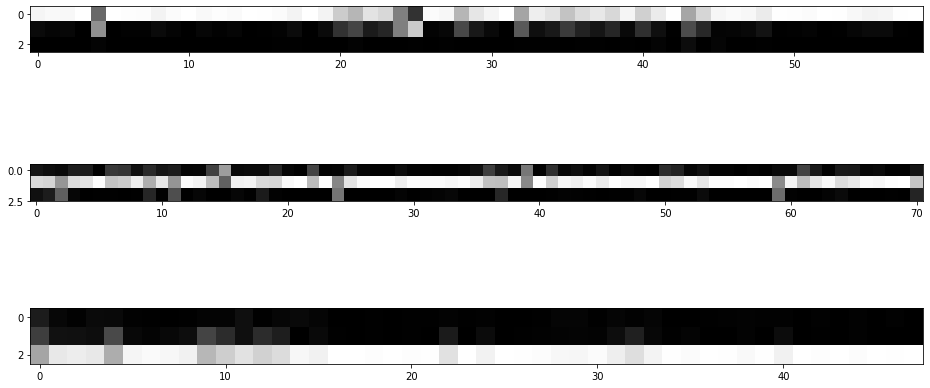

In [0]:
#데이터를 어떻게 분류했는지 178개 데이터에 대한 softmax 출력값을 이미지로 출력.

h = sess.run(hypothesis, feed_dict={x: x_data})
plt.figure(1, figsize=(16,8))
#178*3 행렬을 transpose를 통해 3*178로 변환.
#이를 한개의 그래프로 출력하기에는 힘들어서 클래스 별로 나눔.
#0~58, 59~129, 나머지 이렇게 클래스 3개로 나눔.
plt.subplot(3,1,1)
plt.imshow(h[0:59].T, cmap='gray')
plt.subplot(3,1,2)
plt.imshow(h[59:130].T, cmap='gray')
plt.subplot(3,1,3)
plt.imshow(h[130:178].T, cmap='gray')
#붓꽃에 비해서 복잡함.
#클래스가 명확하기 구분될수도 아닐 수도 있음.
#클래스1의 5번째 데이터가 잘못 나왔음을 알 수 있음.

[0.4166082  0.5649045  0.01848727]


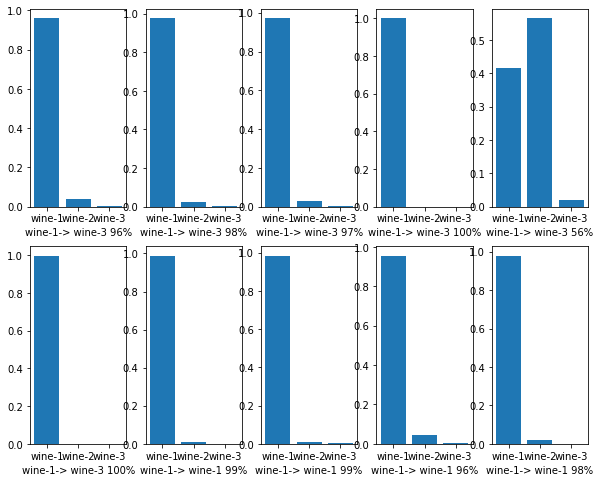

In [0]:
#확률값을 다른 형태의 그래프로 출력.
#이 때, 넘파이의 where함수를 사용해 학습데이터 중 label이 0인 데이터만 출력.
labels = ["wine-1", "wine-2", "wine-3"]

plt.figure(1, figsize=(10,8))

idx = np.where( y_data  == 0)[0]

print(h[4])
for i in range(10) :
    plt.subplot(2, 5, i+1)
    plt.bar(labels, h[idx[i]])
    plt.xlabel("{}-> {} {:2.0f}%".format(labels[int(y_data[i])], labels[p[i]], 100*np.max(h[i], axis=0) )    )
#10개의 그래프를 출력. 소프트맥스 출력값을 바로 표시
#학습 데이터 레이블, 예측 레이블, 최대 확률값을 출력.
#5번째 샘플에 대해 분류가 잘못되었음을 알 수 있음.

[0.4166082  0.5649045  0.01848727]


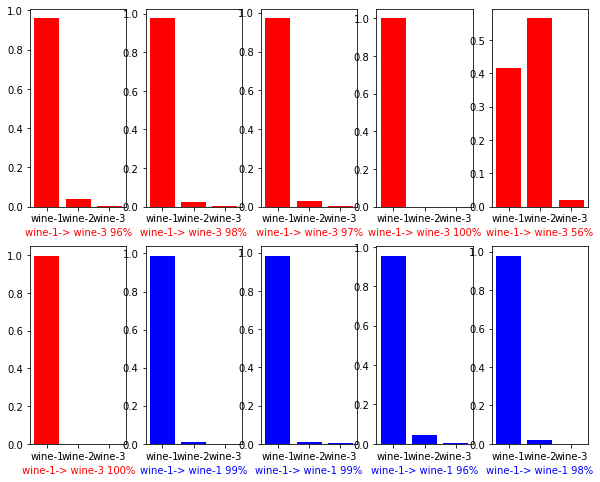

In [0]:
#어떤 샘플에 오류가 발생했는지 명확하게 보이려 색깔 변경.
labels = ["wine-1", "wine-2", "wine-3"]

plt.figure(1, figsize=(10,8))

idx = np.where( y_data  == 0)[0]

print(h[4])
for i in range(10) :
    plt.subplot(2, 5, i+1)
    c =  "blue" if  p[idx[i]] == y_data[idx[i]]   else "red"
    plt.bar(labels, h[idx[i]], color=c)
    plt.xlabel("{}-> {} {:2.0f}%".format(labels[int(y_data[i])], labels[p[i]], 100*np.max(h[i], axis=0) ) ,color = c   )

#오류 발생

In [0]:
#confusion matrix를 이용해 다중 class의 학습 결과를 분석
#confusion matrix는 학습 모델이 제대로 동작하는지 아니면 어느 클래스를 헷깔려하는지 파악 가능.
#행은 실제 클래스, 열은 예측한 클래스.
#따라서 클래스 * 클래스가 confusion matrix 크기.
y =    [0, 0, 1, 1, 2, 2]
pred = [0, 0, 1, 0, 1, 1]
#정확도 - 3/6

confusion_matrix = tf.confusion_matrix(labels=y, predictions=pred, num_classes=3)  #("레이블, 예측값, 클래스 수")  
cm = sess.run(confusion_matrix)

print(cm)
#두번째 행의 의미: 실제 1번 클래스를 0번클래스로 고려한 게 1번
#이를 통해 어떤 클래스끼리 서로 혼동되었는지 알 수 있음. 대각선 값을 모두 더한 것이 정답의 개수.

[[2 0 0]
 [1 1 0]
 [0 2 0]]


In [0]:
#confusion matrix는 정규화를 통해 확률값으로 변경 가능
normal_cm  = cm / cm.sum(axis=1)
print(normal_cm)

[[1.  0.  0. ]
 [0.5 0.5 0. ]
 [0.  1.  0. ]]


In [0]:
p = sess.run(predicted, feed_dict={x: x_data})
confusion_matrix = tf.confusion_matrix(labels=y_data, predictions=p, num_classes=3)    
cm = sess.run(confusion_matrix)

print(cm)

normal_cm  = cm / cm.sum(axis=1).reshape(3,1)
print(normal_cm)

#대각선의 값을 보고 얼마나 학습이 잘 되었는지 파악 가능.

[[57  2  0]
 [ 1 70  0]
 [ 0  0 48]]
[[0.96610169 0.03389831 0.        ]
 [0.01408451 0.98591549 0.        ]
 [0.         0.         1.        ]]
